# Physical setup


In [13]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.3.0rc7


## Basic  setup and C threads

In [14]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl')

===> setting C threads to 12


### C threads

Switch back to a single C thread

In [15]:
my_jet.set_num_c_threads(1)

===> setting C threads to 1


Set a custom number of C treads

In [16]:
my_jet.set_num_c_threads(8)

===> setting C threads to 8


let's try how changes the computational speed with the number of threads

In [17]:
my_jet.set_num_c_threads(1)

===> setting C threads to 1


In [18]:
%timeit my_jet.eval()

71.8 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
my_jet.set_num_c_threads(8)

===> setting C threads to 8


In [20]:
%timeit my_jet.eval()

26.7 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
my_jet.set_num_c_threads(10)

===> setting C threads to 10


In [22]:
%timeit my_jet.eval()

29.9 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
my_jet.set_num_c_threads(20)

===> setting C threads to 20


In [24]:
%timeit my_jet.eval()

24.9 ms ± 456 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


as you can see, the computational speed saturates at 8 threads, to a value fo ~ 20 ms per computation ~50 computation per second, on an 2/6 GHz 6-Core Intel Core i7 (I7-9750H)

### basic configurations

For a list of possible electron distributions you can run the command 

In [25]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


to view all the paramters of the jet model:

In [26]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


In [27]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


None

and the corresponding  astropy table with units can be accessed by: `my_jet.parameters.par_table`

In [28]:
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

---------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


In [29]:
my_jet.cosmo

FlatLambdaCDM(name="Planck13", H0=67.77 km / (Mpc s), Om0=0.30712, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.048252)

## Setting the parameters

In [30]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [31]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution

In [32]:
my_jet.show_electron_distribution()

--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
test,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,R,region_size,cm,1.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,5.000000e+03,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
test,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False


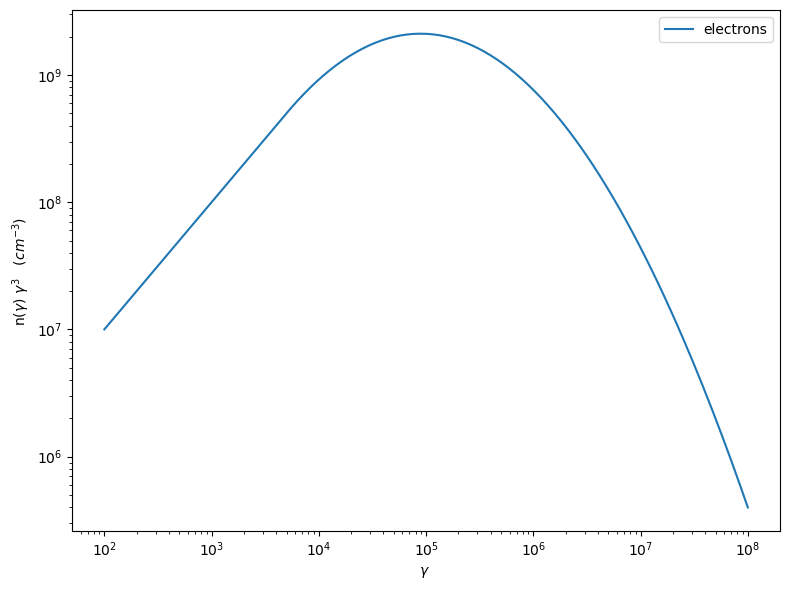

In [33]:
p=my_jet.electron_distribution.plot3p()

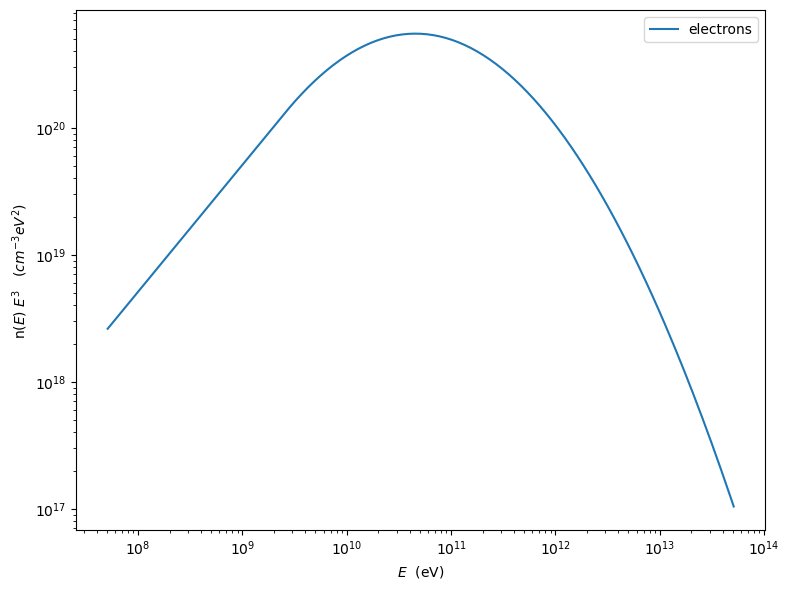

In [34]:
p=my_jet.electron_distribution.plot3p(energy_unit='eV')

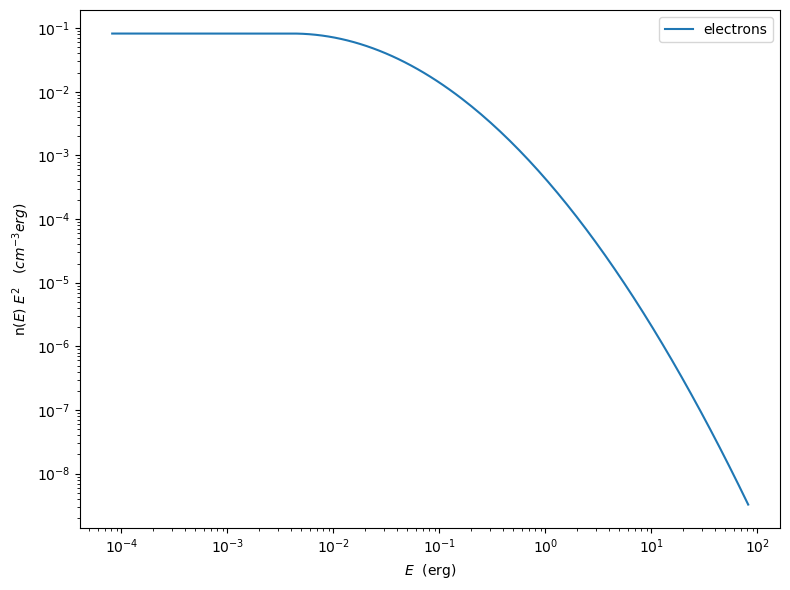

In [35]:
p=my_jet.electron_distribution.plot2p(energy_unit='erg')

to obtain a loglog plot, pass `loglog=True` to the `plot` method

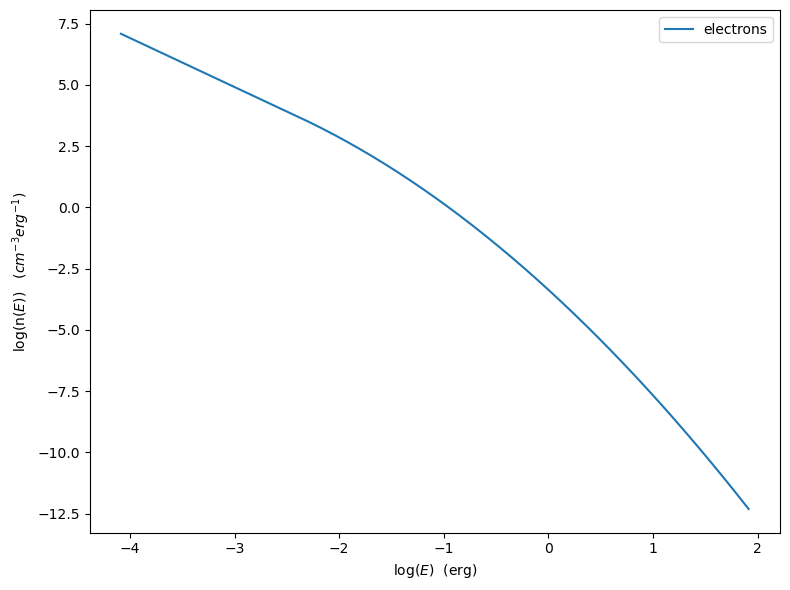

In [36]:
p=my_jet.electron_distribution.plot(energy_unit='erg',loglog=True)

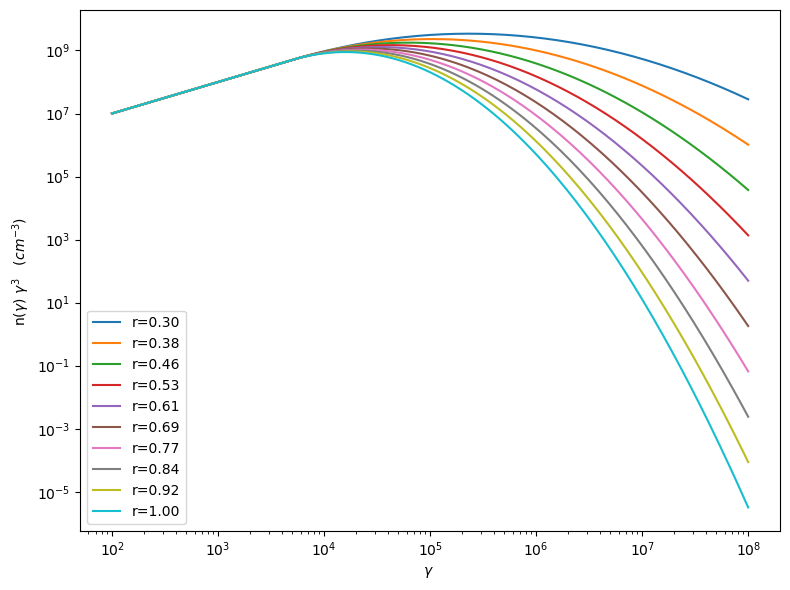

In [37]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    _l='r=%2.2f'%r
    if p is None:
        p=my_jet.electron_distribution.plot3p(label=_l)
    else:
        p=my_jet.electron_distribution.plot3p(p,label=_l)

###  Using log values for electron distribution parameters

In [38]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()

===> setting C threads to 12

--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  True
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-----------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False


--------------------------------------------------------------------------------


## Evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [39]:
my_jet.eval()

In [40]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False


and plot the corresponding SED:


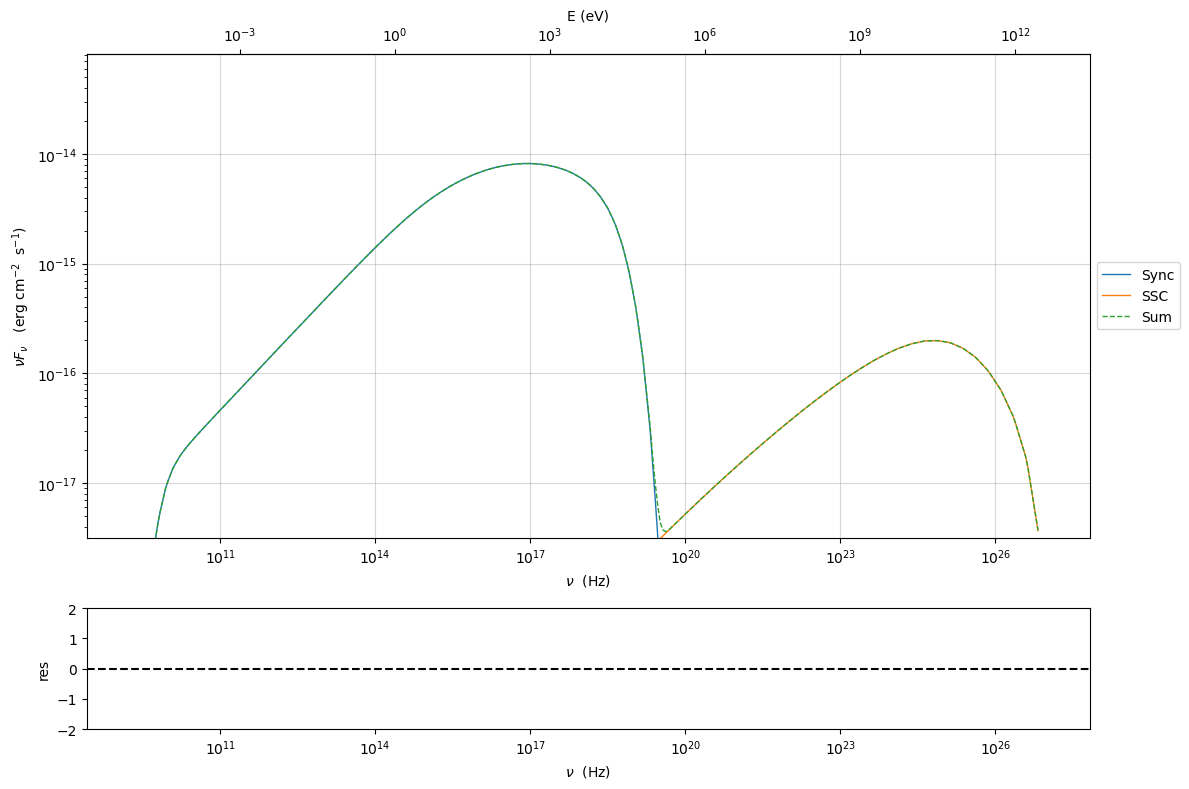

In [41]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.setlim(y_min=10**-17.5)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

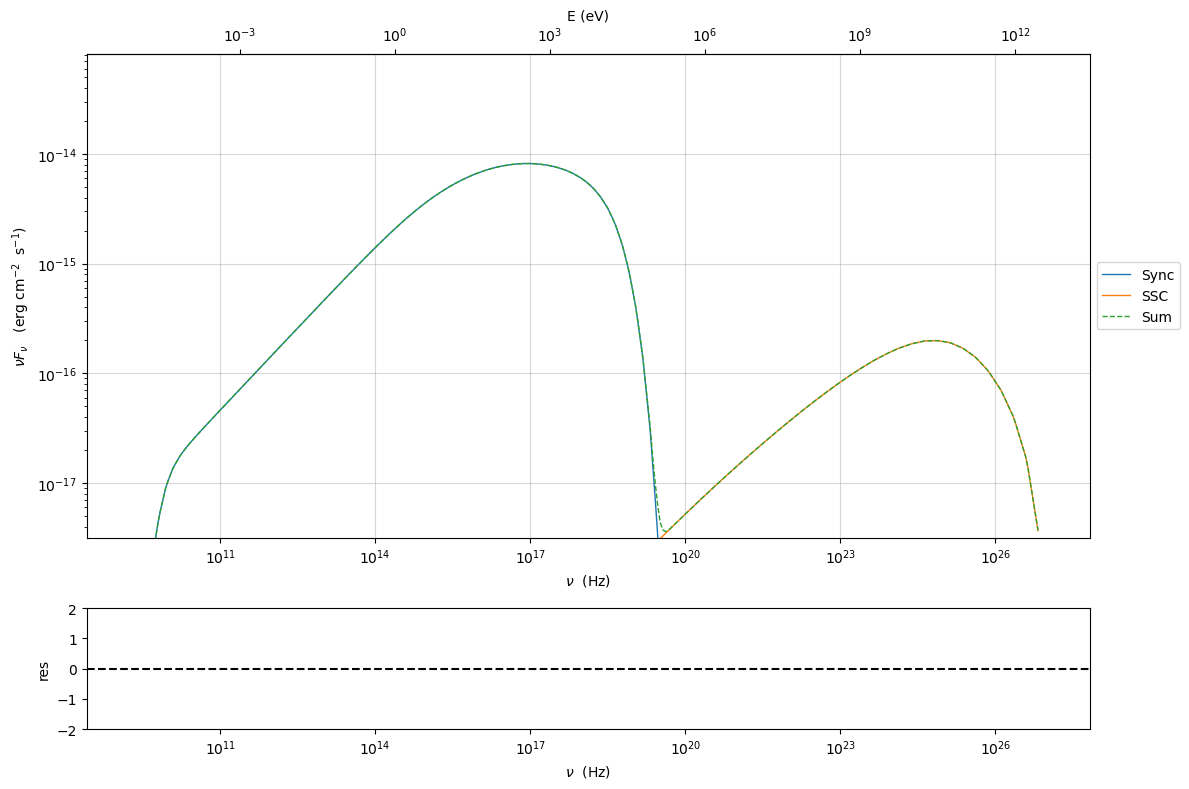

In [42]:
my_plot=my_jet.plot_model()
my_plot.setlim(y_min=10**-17.5)

In [43]:
my_jet.set_IC_nu_size(100)

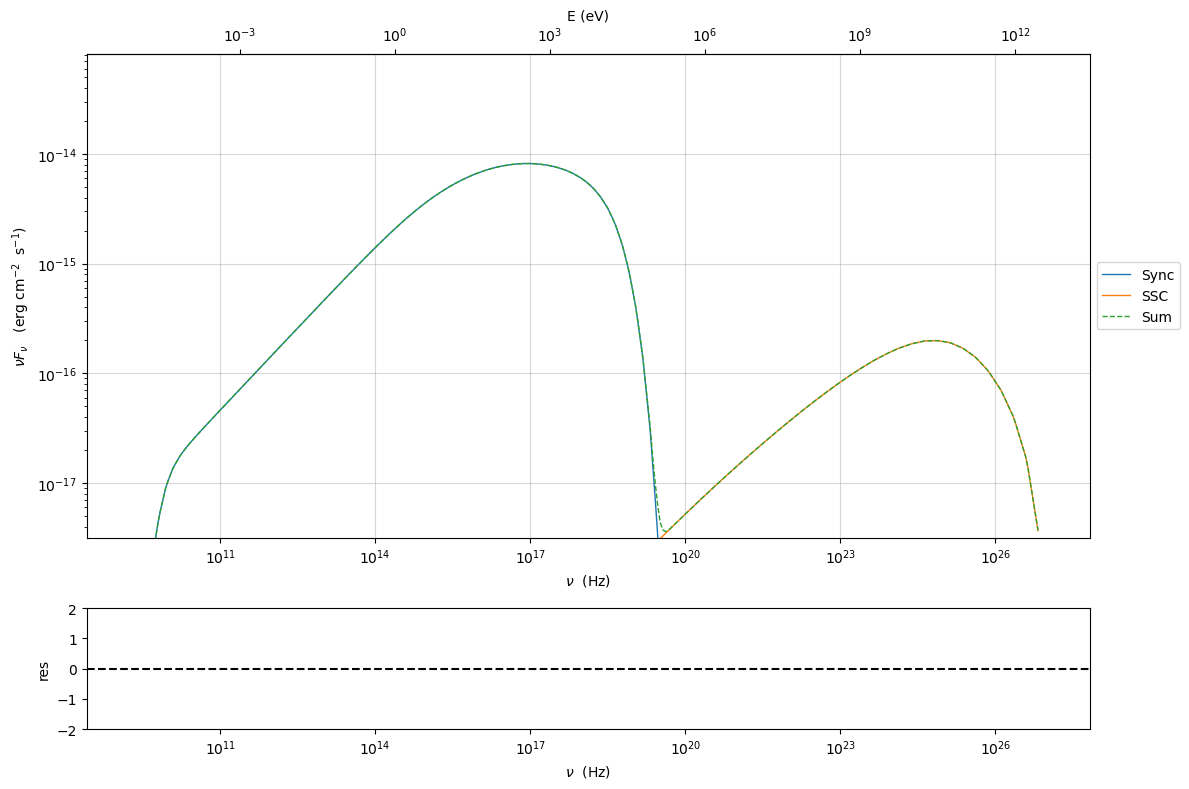

In [44]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.setlim(y_min=10**-17.5)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the isotropic luminosity,
by simply passing the ``frame`` kw to ``src``

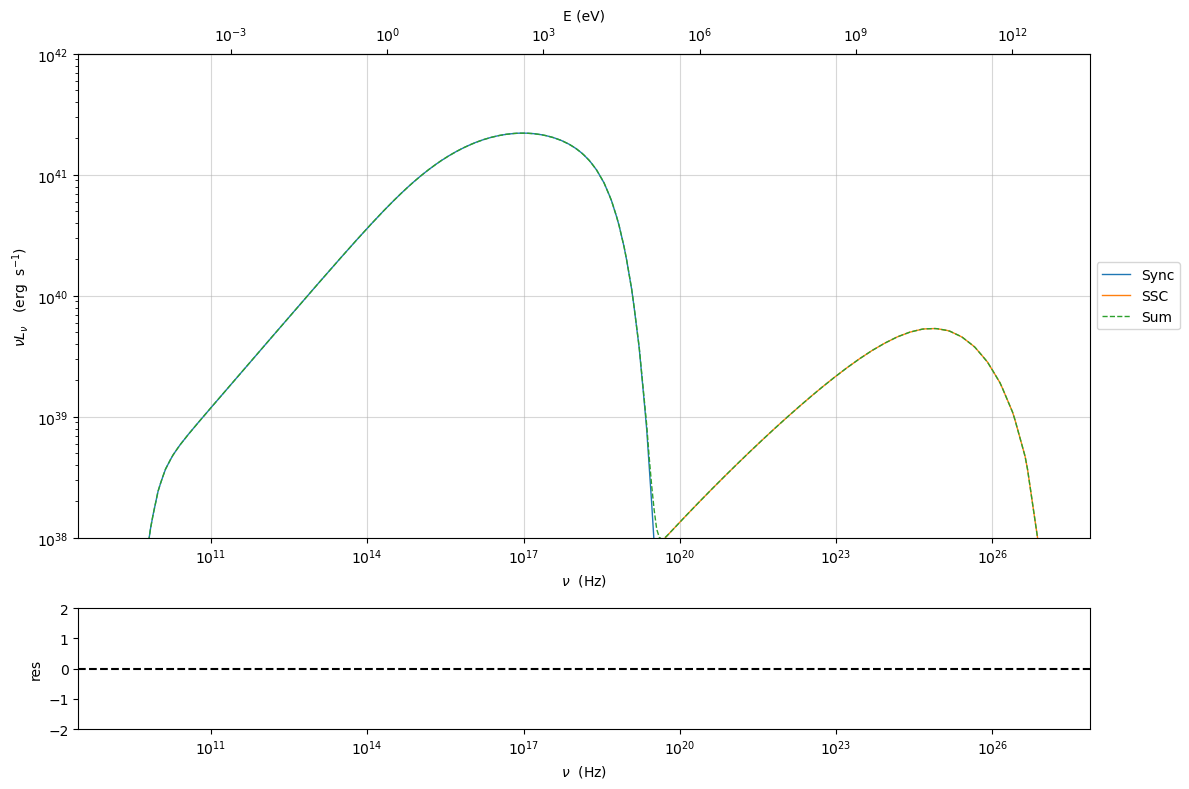

In [45]:
my_plot=my_jet.plot_model(frame='src')
my_plot.setlim(y_max=1E42,y_min=1E38)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

Starting from version 1.2.0 you can also plot in the `Fnu` or `Lnu` representation adding the `density=True` keyword to the `plot_model command`

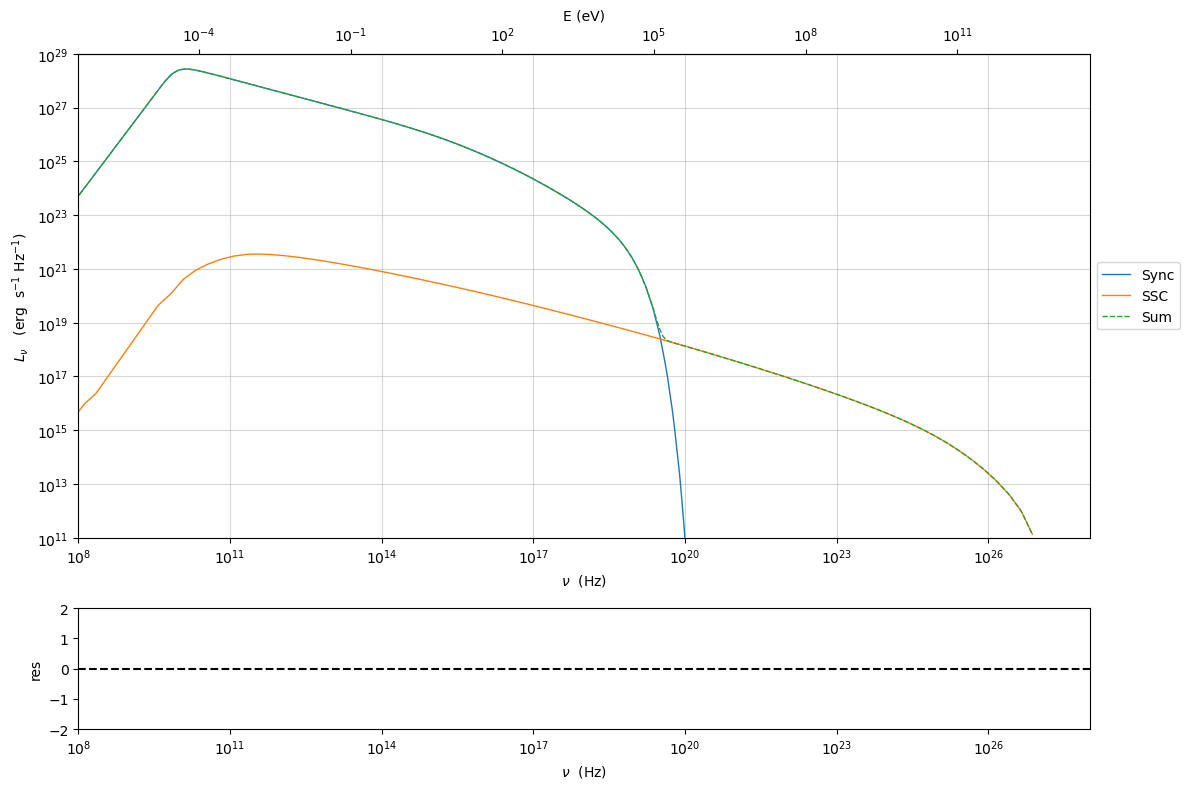

In [46]:
my_plot=my_jet.plot_model(frame='src',density=True)
my_plot.setlim(y_max=1E29,y_min=1E11,x_min=1E8,x_max=1E28)

### Changing the nu grid 
The `SED info`  header displayed by the :meth:`.Jet.show_model()` method reports information for the SED  `nu_min`, `nu_max`, `nu_size` and `nu_grid_size`. 

- The `nu_grid_size` is the internal interpolation grid used by `jetkernel` C code, and it should not be changed

- The `nu_size` is the Python  interpolation grid used by the Python wrapper on top of the `jetkernel` one, and is used only for the SEDs production and plotting. 

- `nu_min` and `nu_max`, are used for the boundaries of the model, and can be changed if the custom value does not cover your expected range.

In [47]:
my_jet.nu_min=1E5
my_jet.nu_size=400
my_jet.nu_max=1E30

In [48]:
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  True
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 400
 nu mix (Hz): 1.000000e+05
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

----------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False


--------------------------------------------------------------------------------


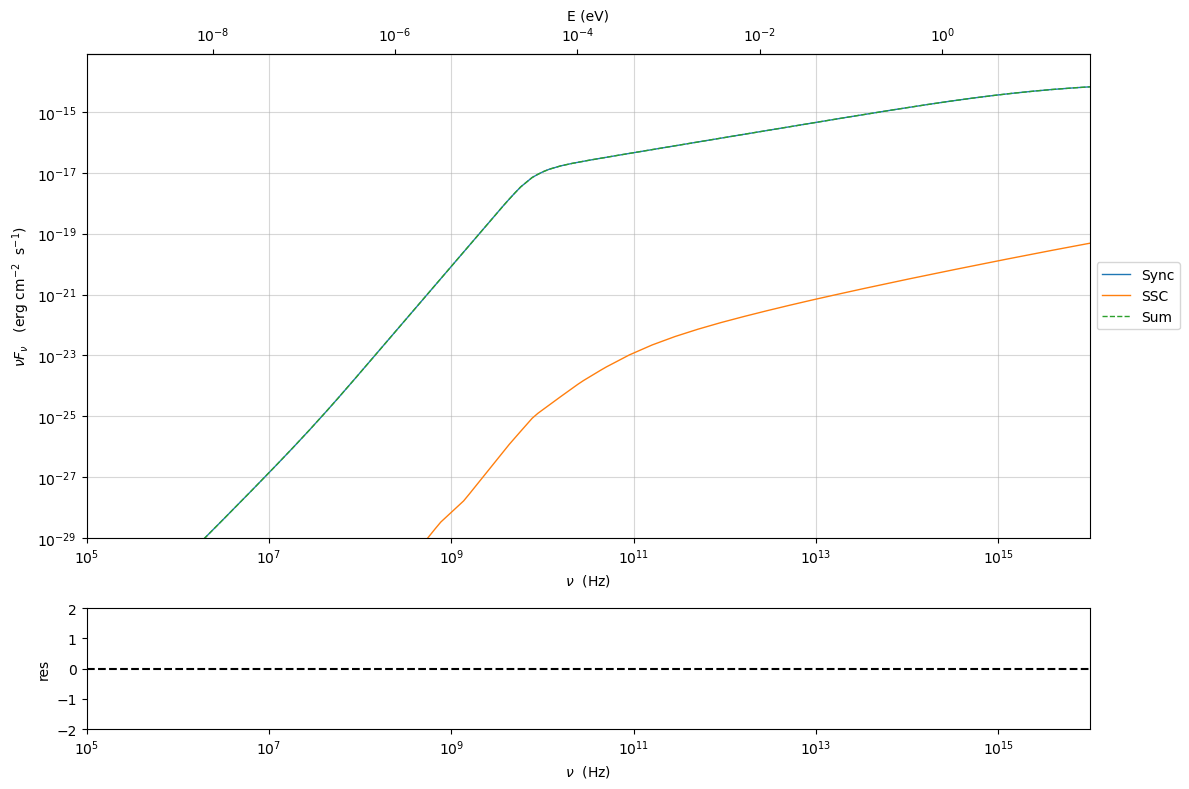

In [49]:
my_jet.eval()
import matplotlib.ticker as ticker
p=my_jet.plot_model()
p.setlim(x_min=1E5,x_max=1E16,y_min=10**-29)
plt.show()

## Comparing models on the same plot

to compare the same model after changing a parameter

===> setting C threads to 12


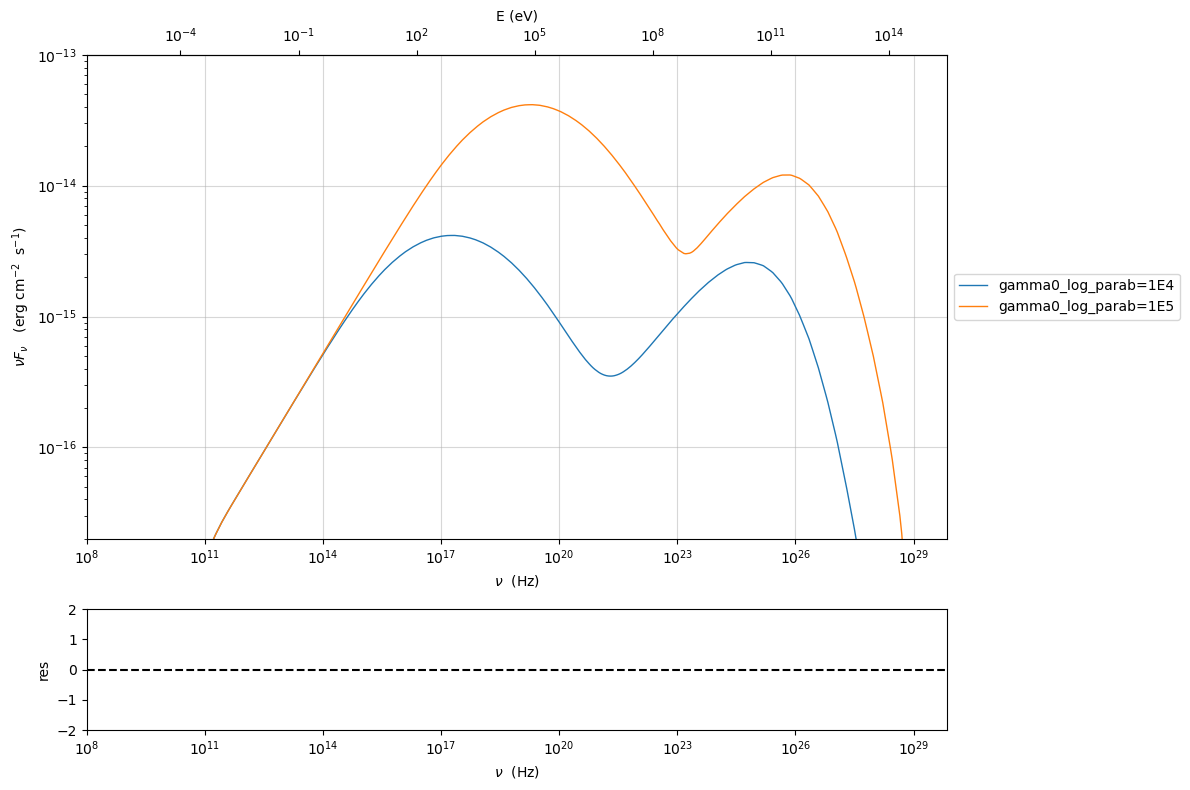

In [50]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.setlim(y_max=1E-13,y_min=2E-17,x_min=1E8)

## Saving a plot

to save the plot

In [51]:
my_plot.save('jet1.png')

## Saving and loading  a model

In [52]:
my_jet.save_model('test_model.pkl')

In [53]:
my_jet_new=Jet.load_model('test_model.pkl')

===> setting C threads to 12


## Switching on/off the particle distribution normalization

In [54]:
my_jet.Norm_distr

True

and then you can switch off the normalization withe command

In [55]:
my_jet.switch_Norm_distr_OFF()

OR

In [56]:
my_jet.Norm_distr=0

In [57]:
my_jet.switch_Norm_distr_ON()

OR

In [58]:
my_jet.Norm_distr=1

## Setting the particle density  from observed Fluxes or Luminosities

In [59]:
my_jet=Jet(name='test',electron_distribution='lppl')

===> setting C threads to 12


this is the initial value of N

In [60]:
my_jet.parameters.N.val

100

In [61]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [62]:
my_jet.get_par_by_name('N').val

272.4

OR

In [63]:
my_jet.parameters.N.val

272.4

In [64]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,2.723756e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


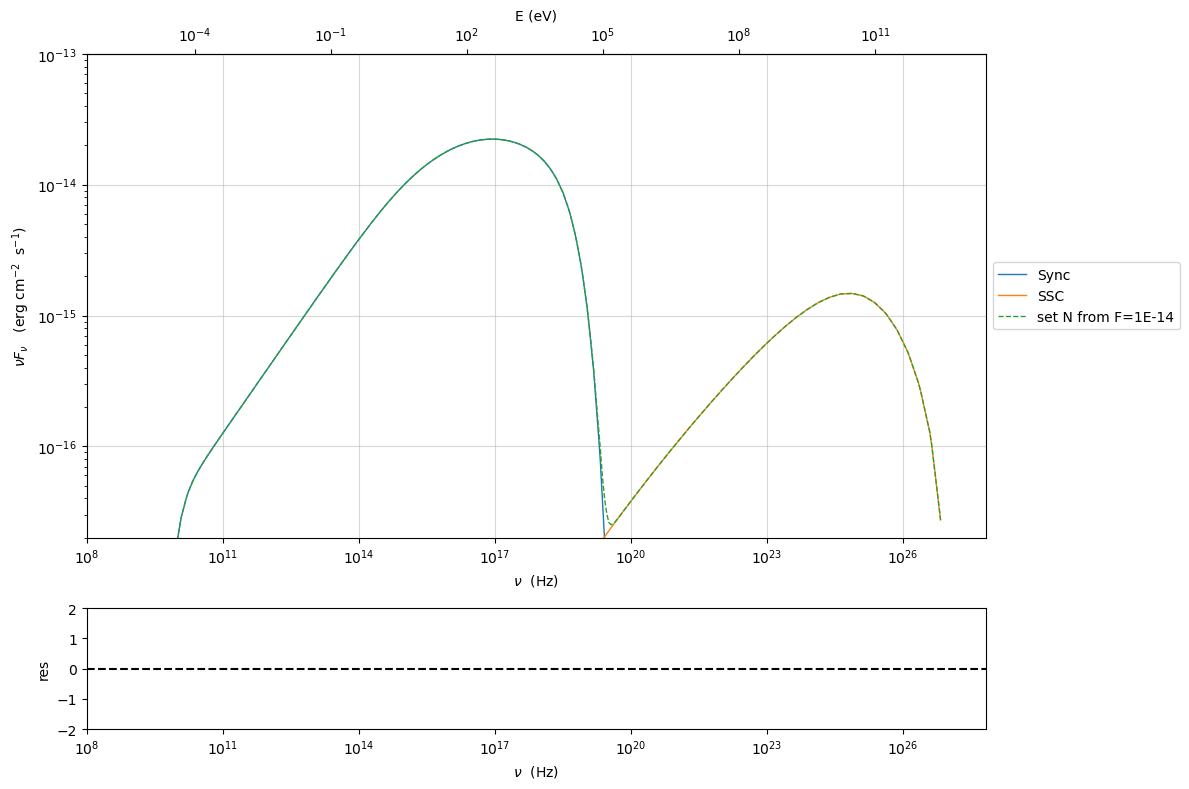

In [65]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.setlim(y_max=1E-13,y_min=2E-17,x_min=1E8)

In [66]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

## Setting the beaming factor and expression

In [67]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

===> setting C threads to 12


In [68]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,1.000000e+05,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


In [69]:
my_jet.get_beaming()

19.94

In [70]:
my_jet.set_par('theta',val=10.)

In [71]:
my_jet.get_beaming()

4.968

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [72]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

===> setting C threads to 12


In [73]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


## Switch ON/OFF Synchrotron sefl-absorption and IC emission

In [74]:
my_jet.show_model()


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

---------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,beam_obj,beaming,,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


as you see the state of Sync emission is `self-abs`, we can check accessing the specific spectral component state, and get the allowed states value

In [75]:
my_jet.spectral_components.Sync.show()

name                : Sync
var name            : do_Sync
state               : self-abs
allowed states : ['on', 'off', 'self-abs']


In [76]:
my_jet.spectral_components.Sync.state='on'

now the sate is 'on' with no 'self-abs' 

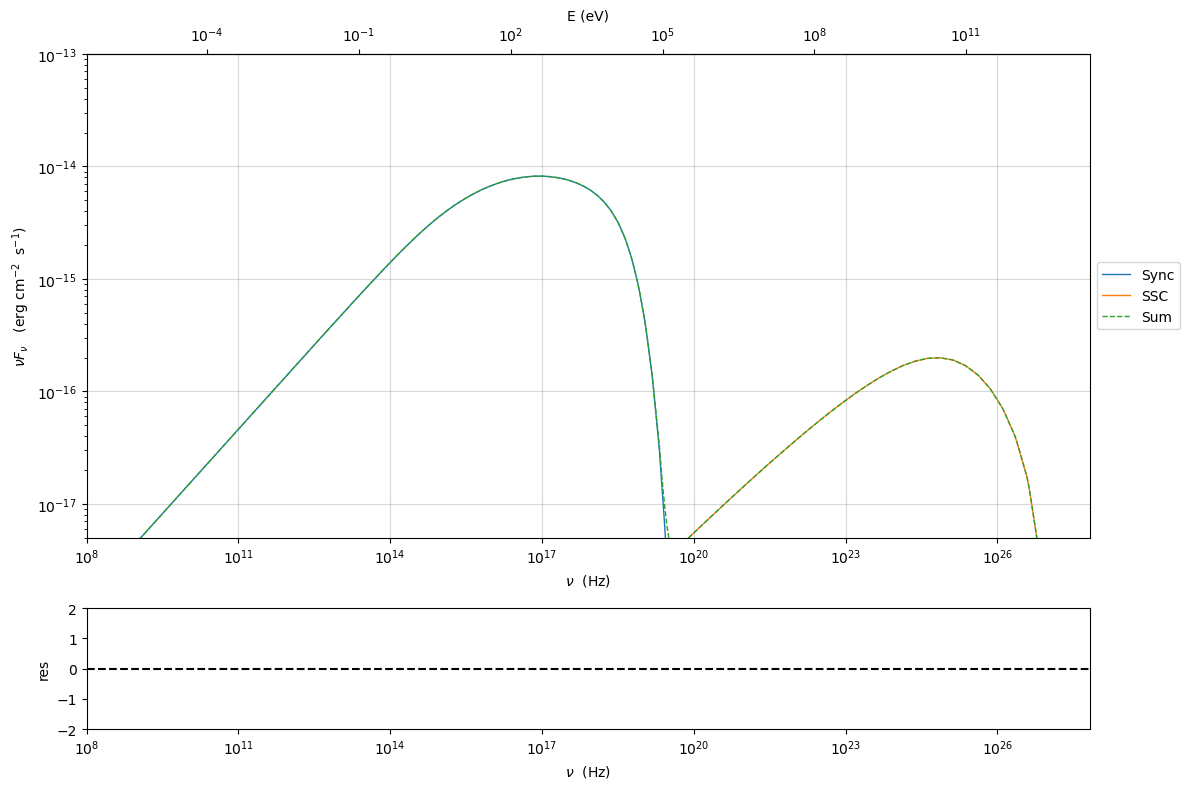

In [77]:
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=5E-18,x_min=1E8)

to re-enable

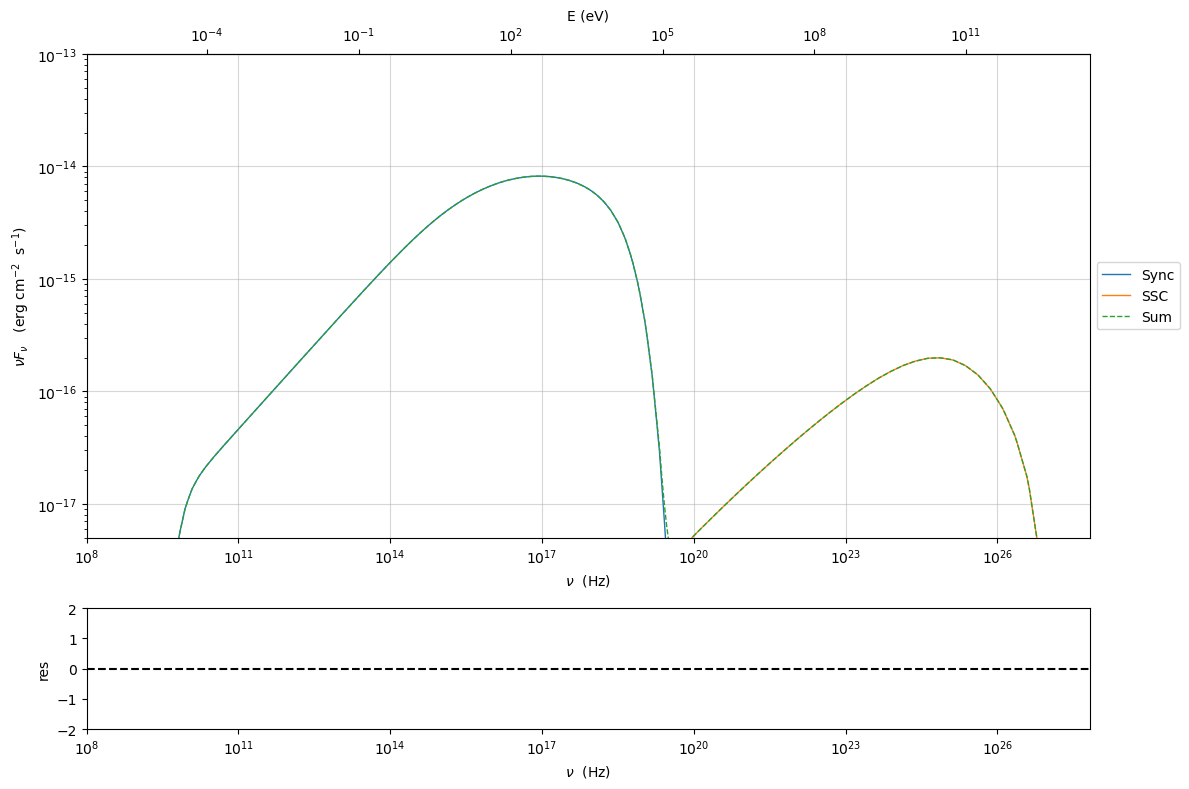

In [78]:
my_jet.spectral_components.Sync.state='self-abs'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=5E-18,x_min=1E8)

In [79]:
my_jet.spectral_components.SSC.show()

name                : SSC
var name            : do_SSC
state               : on
allowed states : ['on', 'off']


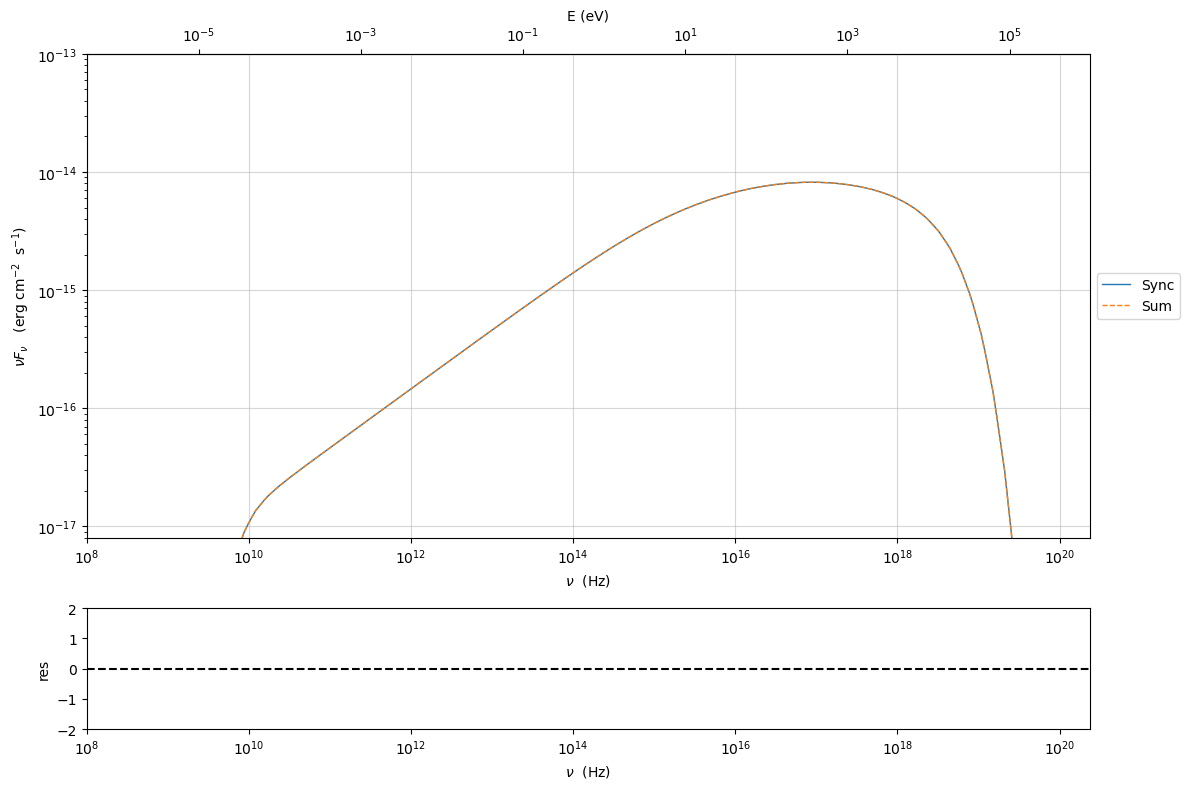

In [80]:
my_jet.spectral_components.SSC.state='off'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=8E-18,x_min=1E8)

to re-enable

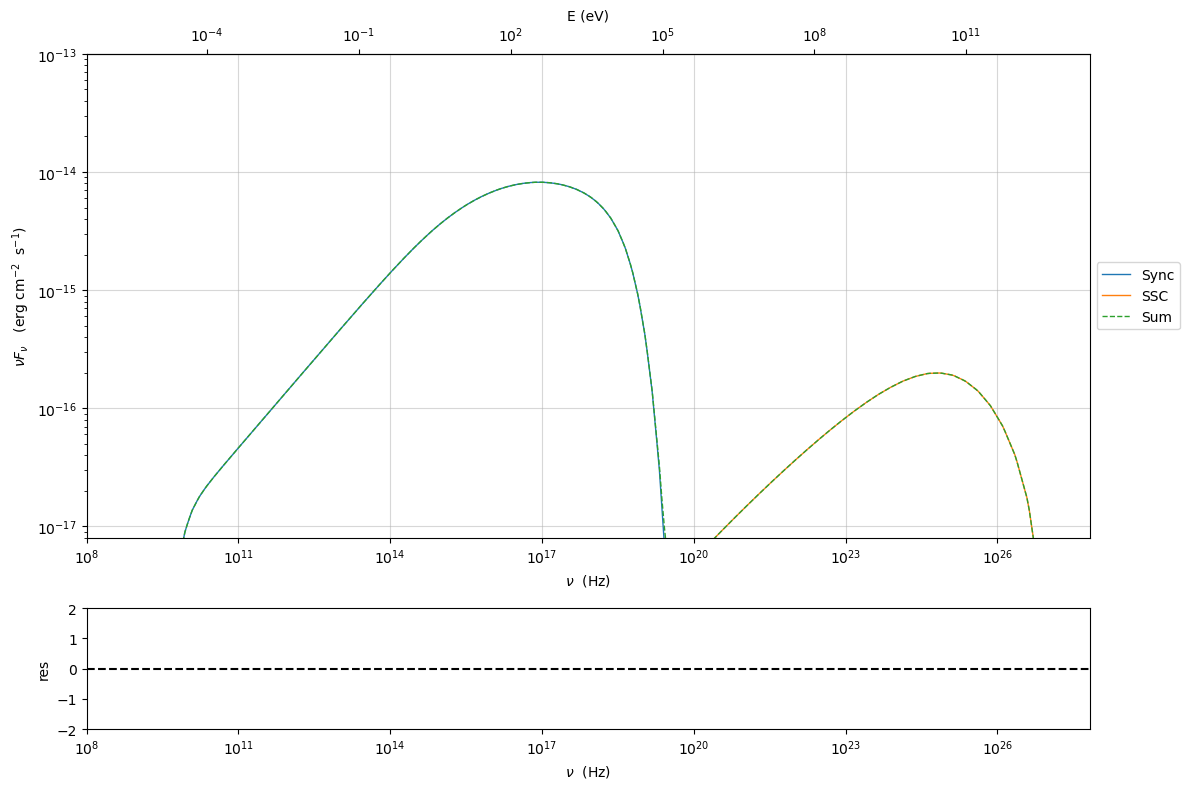

In [81]:
my_jet.spectral_components.SSC.state='on'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=8E-18,x_min=1E8)

## Accessing individual spectral components

It is possible to access specific spectral components of our model

In [82]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

===> setting C threads to 12


In [83]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [84]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [85]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [86]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

(1e-20, 1e-10)

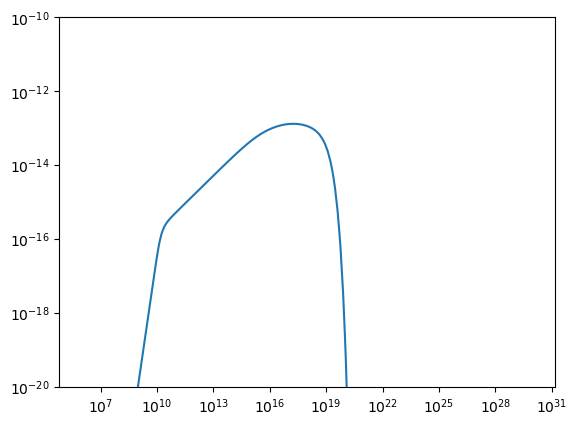

In [87]:
plt.loglog(nu_sync,nuFnu_sync)
plt.ylim(1E-20,1E-10)

In [88]:
print (nuFnu_sync[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.04250670e-26
 2.16351829e-24 9.84432972e-23 4.74613296e-21 2.28931297e-19
 1.09662087e-17 1.83733916e-16 4.11135769e-16 7.21745036e-16
 1.25581697e-15 2.18363181e-15 3.79383567e-15 6.57833387e-15
 1.13501032e-14 1.93585563e-14 3.21429895e-14 5.06938061e-14
 7.36908738e-14 9.77112603e-14 1.17645633e-13 1.28621805e-13
 1.26850509e-13 1.10646286e-13 7.82537850e-14 3.17631756e-14
 2.39710785e-15 8.88519981e-19 7.47780581e-29 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / (s cm2)


In [89]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [90]:
print (nuLnu_sync_src[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.63219228e+30
 5.84406112e+31 2.65913465e+33 1.28201787e+35 6.18385569e+36
 2.96217481e+38 4.96299126e+39 1.11055338e+40 1.94956618e+40
 3.39219277e+40 5.89839143e+40 1.02478484e+41 1.77692906e+41
 3.06587177e+41 5.22910236e+41 8.68241307e+41 1.36933301e+42
 1.99052613e+42 2.63936099e+42 3.17782509e+42 3.47431170e+42
 3.42646573e+42 2.98875984e+42 2.11377876e+42 8.57981835e+41
 6.47502951e+40 2.40005601e+37 2.01989298e+27 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / s


In [91]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [92]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (s cm2),erg / (s cm2),erg / (s cm2)
float64,float64,float64,float64
1000000.0,0.0,0.0,0.0
3026648.059395689,0.0,0.0,0.0
9160598.47544371,0.0,0.0,0.0
27725907.59860481,6.042506698961876e-26,6.042506698961876e-26,0.0
83916564.42830162,2.163518310314854e-24,2.1635182921864927e-24,1.812816291990128e-32
253985906.87807292,9.844329807737109e-23,9.844329720868366e-23,8.68551689841149e-31
768725952.1663721,4.746132990060179e-21,4.746132957910235e-21,3.2149712394627884e-29
2326662911.331458,2.2893129865238557e-19,2.289312967845199e-19,1.8678480792336018e-27


In [93]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [94]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,0.0,0.0,0.0
3329312.865335258,0.0,0.0,0.0
10076658.322988082,0.0,0.0,0.0
30498498.35846529,1.6321922754264707e+30,1.6321922754264707e+30,0.0
92308220.8711318,5.84406116495712e+31,5.84406111598908e+31,4.896750464607491e+23
279384497.56588024,2.6591346719896186e+33,2.659134648524772e+33,2.3461179765193927e+25
845598547.3830093,1.2820178760999728e+35,1.2820178674156813e+35,8.684229052937516e+26
2559329202.464604,6.183855738678291e+36,6.183855688223801e+36,5.045401450889629e+28


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [95]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01873429e+33,
           3.64757605e+34, 1.65970130e+36, 8.00172615e+37, 3.85965914e+39,
           1.84884409e+41, 3.09765550e+42, 6.93152902e+42, 1.21682350e+43,
           2.11724020e+43, 3.68148636e+43, 6.39620389e+43, 1.10907188e+44,
           1.91356665e+44, 3.26374898e+44, 5.41913600e+44, 8.54670440e+44,
           1.24238869e+45, 1.64735955e+45, 1.98344242e+45, 2.16849480e+45,
           2.13863170e+45, 1.86543717e+45, 1.31931693e+45, 5.35510141e+44,
           4.04139555e+43, 1.49799713e+40, 1.26071804e+30, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / s>

the table can be easily saved as an ascii file

In [96]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)

or in fits format

In [97]:
t_src.write('test_SED.fits',format='fits',overwrite=True)

## Energetic report

It is possible to get an energetic report of the jet model (updated each time that you evaluate the model).
This report gives energy densities (`U_`) (both in the blob end disk restframe), the luminosities of the emitted
components in the blob restframe (`L_`), and the luminosity carried by the jet (`jet_L`) for the radiative 
components, the electrons, the magnetic fields, and for the cold protons in the jet.

### case of  beaming expression 'bulk_theta'

In [98]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.parameters.BulkFactor.val=15

===> setting C threads to 12


In [99]:
my_jet


--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

---------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.500000e+01,1.000000e+00,1.000000e+05,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


None

In [100]:
my_jet.eval()

In [101]:
my_jet.energetic_report()

name,type,units,val
BulkLorentzFactor,jet-bulk-factor,,1.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e-01
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_Synch,Energy dens. blob rest. frame,erg / cm3,1.831568e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,1.472951e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


If you want to evaluate the energetic report in non verbose mode:

In [102]:
my_jet.energetic_report(verbose=False)

In [103]:
my_jet.energetic_dict

{'BulkLorentzFactor': 15,
 'U_e': 0.001737,
 'U_p_cold': 0.1503,
 'U_B': 0.0003979,
 'U_Synch': 1.832e-05,
 'U_Synch_DRF': 14.73,
 'U_Disk': 0,
 'U_BLR': 0,
 'U_DT': 0,
 'U_CMB': 0,
 'U_Star': 0,
 'U_Disk_DRF': 0,
 'U_BLR_DRF': 0,
 'U_DT_DRF': 0,
 'U_CMB_DRF': 0,
 'U_Star_DRF': 0,
 'U_seed_tot': 1.832e-05,
 'L_Sync_rf': 1.725e+38,
 'L_SSC_rf': 3.823e+36,
 'L_EC_Disk_rf': 0,
 'L_EC_BLR_rf': 0,
 'L_EC_DT_rf': 0,
 'L_EC_CMB_rf': 0,
 'L_EC_Star_rf': 0,
 'jet_L_Sync': 9.682e+39,
 'jet_L_SSC': 2.146e+38,
 'jet_L_EC_Disk': 0,
 'jet_L_EC_BLR': 0,
 'jet_L_EC_Star': 0,
 'jet_L_EC_DT': 0,
 'jet_L_EC_CMB': 0,
 'jet_L_pp_gamma': 0,
 'jet_L_rad': 9.896e+39,
 'jet_L_kin': 8.038e+43,
 'jet_L_tot': 8.06e+43,
 'jet_L_e': 9.18e+41,
 'jet_L_B': 2.103e+41,
 'jet_L_p_cold': 7.946e+43,
 'NH_cold_to_rel_e': 1}

In [104]:
my_jet.energetic_report_table

name,type,units,val
str17,str29,object,float64
BulkLorentzFactor,jet-bulk-factor,,1.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e-01
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_Synch,Energy dens. blob rest. frame,erg / cm3,1.831568e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,1.472951e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [105]:
my_jet.show_model()



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: test  
geometry: spherical  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e+00

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sum, hidden: False
   name:Sync, state: self-abs
   name:Sync, hidden: False
   name:SSC, state: on
   name:SSC, hidden: False
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

---------------------------------------------

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e+00,0.000000e+00,--,False,True
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,9.000000e+01,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.500000e+01,1.000000e+00,1.000000e+05,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


### case of  beaming expression 'delta'

In [106]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')
my_jet.parameters.beam_obj.val=25
my_jet.eval()

===> setting C threads to 12


In [107]:
my_jet.energetic_report()

name,type,units,val
BulkLorentzFactor,jet-bulk-factor,,2.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,1.503276e-01
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_Synch,Energy dens. blob rest. frame,erg / cm3,1.831568e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,7.154561e+00
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_DT,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_CMB,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
